In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

plt.style.use("fivethirtyeight")
sns.set_style("darkgrid")

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, auc, roc_curve, roc_auc_score

from xgboost import XGBClassifier, plot_importance

from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('sample_submission.csv')

train = train.drop(['id'], axis=1)
test = test.drop(['id'], axis=1)

In [4]:
display(train.head())
display(test.head())
display(sub.head())

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,0,0,1,0,1,0,0,0,0,0,...,0,0,21,0,0,0,0,0,0,Class_2
1,0,0,0,0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,0,0,0,0,0,0,0,0,0,2,...,0,1,0,0,0,0,13,2,0,Class_1
3,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,1,0,Class_4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Class_2


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,0,0,0,0,0,0,4,4,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,2,0,7,7,...,3,0,1,0,0,0,1,0,2,1
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,6,0
3,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,6,9,14,3
4,0,0,0,0,0,0,1,0,4,0,...,1,0,0,0,0,0,0,0,0,0


,id,Class_1,Class_2,Class_3,Class_4
0,100000,0.25,0.25,0.25,0.25
1,100001,0.25,0.25,0.25,0.25
2,100002,0.25,0.25,0.25,0.25
3,100003,0.25,0.25,0.25,0.25
4,100004,0.25,0.25,0.25,0.25


In [5]:
len(train)

100000

## XGboost

Relationship in the datas are useless

In [6]:
# Independant variable
X = train.iloc[:,:-1]

# Dependant variable
y = train['target']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [8]:
print("Length of X_train is: {X_train}".format(X_train = len(X_train)))
print("Length of X_test is: {X_test}".format(X_test = len(X_test)))
print("Length of y_train is: {y_train}".format(y_train = len(y_train)))
print("Length of y_test is: {y_test}".format(y_test = len(y_test)))

Length of X_train is: 80000
Length of X_test is: 20000
Length of y_train is: 80000
Length of y_test is: 20000


In [9]:
xgb_params = {
     "seed":42,
    "n_estimators":10000,
    "verbosity":1,
    "eval_metric":"mlogloss",
    "alpha":7.105038963844129,
    "colsample_bytree":0.25505629740052566,
    "gamma":0.4999381950212869,
    "reg_lambda":1.7256912198205319,
    "learning_rate":0.011823142071967673,
    "max_bin":338,
    "max_depth":8,
    "min_child_weight":2.286836198630466,
    "subsample":0.618417952155855,
    'tree_method':'gpu_hist',
    'gpu_id':0
}
xgb_params['interaction_constraints'] = '[[38, 14], [34, 14, 31], [15, 19]]'

In [10]:
model = XGBClassifier(params=xgb_params,random_state=42,predictor='gpu_predictor', use_label_encoder=True)
model.fit(X, y)

[20:37:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "params" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:37:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              objective='multi:sof...
                      'learning_rate': 0.011823142071967673, 'max_bin': 338,
                      'max_depth': 8, 'min_child_weight': 2.286836198630466,
                      'n_estimators': 10000, 'reg_lambda': 1.7256912198205319,
                      'seed': 42, 'subsample': 0.618417952155855,
                      'tree_method': 'gpu_hist', 'verbosity': 1},
              predictor='gpu_predictor', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_

In [11]:
display(X.head())
display(y.head())
display(test.head())

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,0,0,1,0,1,0,0,0,0,0,...,3,0,0,21,0,0,0,0,0,0
1,0,0,0,0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,2,...,0,0,1,0,0,0,0,13,2,0
3,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


0    Class_2
1    Class_1
2    Class_1
3    Class_4
4    Class_2
Name: target, dtype: object

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,0,0,0,0,0,0,4,4,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,2,0,7,7,...,3,0,1,0,0,0,1,0,2,1
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,6,0
3,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,6,9,14,3
4,0,0,0,0,0,0,1,0,4,0,...,1,0,0,0,0,0,0,0,0,0


In [12]:
y_pred_xgb = model.predict(X)

In [13]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y,y_pred_xgb)
print(accuracy)

0.60769


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

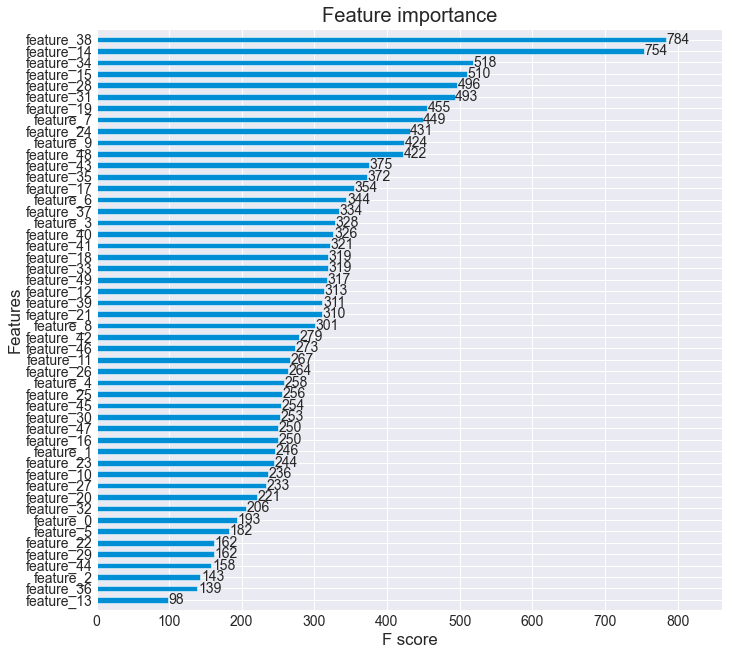

In [14]:
fig, ax = plt.subplots(figsize=(10,10))
plot_importance(model,
                height=0.5,
               max_num_features=None,
               title='Feature importance',
                xlabel='F score', 
                ylabel='Features',
               ax=ax)

In [15]:
submission_xgb = pd.DataFrame(y_pred_xgb, columns=['Class_1','Class_2','Class_3','Class_4'])
submission_xgb.insert(0, 'id',sub['id'])
submission_xgb

ValueError: Shape of passed values is (100000, 1), indices imply (100000, 4)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 

In [ ]:
y = train['target']
acc = accuracy_score(y, y_pred_xgb)

In [ ]:
submission_xgb.to_csv('Submission1.csv', index = False)

## Dimension Reduction ( bunked, this gives very low accuracy )

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelBinarizer

In [ ]:
label_dict = {val:idx for idx, val in enumerate(sorted(train['target'].unique()))}
train['target'] = train['target'].map(label_dict)

In [ ]:
from umap import UMAP

train_sub = train.sample(10000, random_state=156)
target = train_sub['target']
umap = UMAP(random_state=156)
dr = umap.fit_transform(train_sub.iloc[:,:-1], target)

test_sub = test.sample(50000, random_state=156)
umap = UMAP(random_state=156)
dr2 = umap.fit_transform(test_sub)

In [ ]:
dr

In [ ]:
dr2

In [ ]:
display(len(dr[target==0]))
display(len(dr[target==1]))
display(len(dr[target==2]))
display(len(dr[target==3]))

In [ ]:
rf_clf = RandomForestClassifier(random_state=156)
rf_clf.fit(dr,target)

In [ ]:
rf_clf.predict_proba(dr)

In [ ]:
pred = rf_clf.predict_proba(dr2)

In [ ]:
pred_df = pd.DataFrame(pred)

In [ ]:
pred_df.head(5)

In [ ]:
submission_rf = pd.DataFrame(pred, columns=['Class_1','Class_2','Class_3','Class_4'])

In [ ]:
submission_rf.insert(0, 'id',sub['id'])
submission_rf

In [ ]:
submission_rf.to_csv('Submission2.csv', index = False)